In this notebook we plot Fmed, using the results of the numerical simulations, and comparisons to analytic results in the large-Nc factorizable limit

In [ ]:
from plot_functions import *

In [3]:
Qs = np.sqrt(q*L)

th_Qs_values = np.array([])
for z in z_values:
    th_Qs = np.sqrt(q*L)/(w(z))
    th_Qs_values = np.append(th_Qs_values,th_Qs)
log_oneover_th_Qs = np.log(1/th_Qs_values)

th_ho_values = np.array([])
for z in z_values:
    th_ho = (q*w(z))**(1/4)/(w(z))
    th_ho_values = np.append(th_ho_values,th_ho)
log_oneover_th_ho = np.log(1/th_ho_values)

th_tf_values = np.array([])
for z in z_values:
    th_tf = np.sqrt(2/(L*w(z)))
    th_tf_values = np.append(th_tf_values,th_tf)
log_oneover_th_tf = np.log(1/th_tf_values)

In [4]:
time_frac = 1
time_n = int(len(t)*time_frac)-1
time = t[time_n]

Fmed_full,Fmed_Nc,Fmed_diag_sim,Fmed_diag_true = Fmed(time_frac)

Fmed_error_diag_full = abs(Fmed_full-Fmed_diag_sim)/(1+abs(Fmed_full))
Fmed_error_Nc_full = abs(Fmed_full-Fmed_Nc)/(1+abs(Fmed_full))
Fmed_error_diag_Nc = abs(Fmed_Nc-Fmed_diag_sim)/(1+abs(Fmed_Nc))
Fmed_error_diag = abs(Fmed_diag_sim-Fmed_diag_true)/(1+abs(Fmed_diag_true))

<Figure size 3840x2880 with 0 Axes>

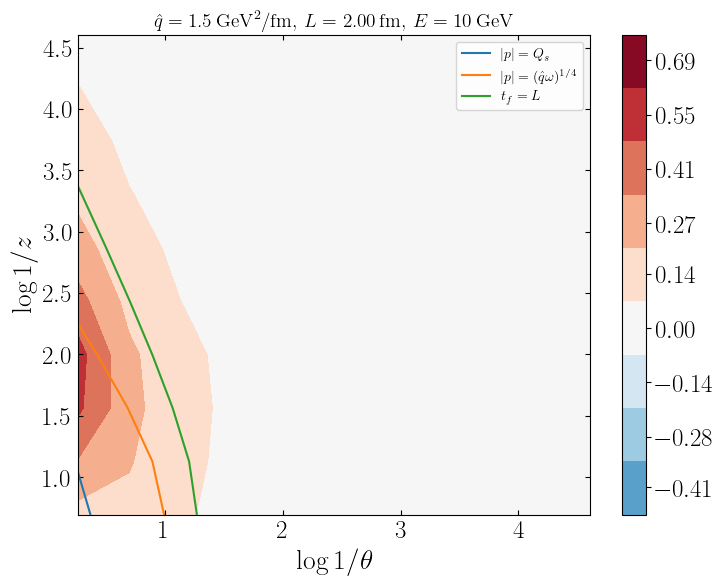

In [5]:
zmi = -0.4
zma = 0.7

pl(Fmed_full,0,time,name='Fmed_full',show=False,mima=[zmi,zma])
plt.plot(log_oneover_th_Qs,log_oneover_z,label=r"$|p|=Q_s$")
plt.plot(log_oneover_th_ho,log_oneover_z,label=r"$|p|=(\hat q \omega)^{1/4}$")
plt.plot(log_oneover_th_tf,log_oneover_z,label=r"$t_f=L$")
plt.xlim(np.min(log_oneover_th),np.max(log_oneover_th))
plt.ylim(np.min(log_oneover_z),np.max(log_oneover_z))
plt.legend(loc="upper right")

plt.savefig(f'plots/Lund-qs_{EGev}.png', bbox_inches='tight')

plt.show()

# Time plot

0.5 [0.0568981  0.13572088]


/Users/johannes/Library/CloudStorage/Dropbox/PhD/Code/schrodinger/plot_functions.py:113: RuntimeWarning: divide by zero encountered in cdouble_scalars
  num = 2*w(z)*O(z)/np.tan(O(z)*t)
/Users/johannes/Library/CloudStorage/Dropbox/PhD/Code/schrodinger/plot_functions.py:114: RuntimeWarning: divide by zero encountered in cdouble_scalars
  den = 2*w(z)*O(z)/np.tan(O(z)*t)+1j*q*(z**2+(1-z)**2)*(L-t)
/Users/johannes/Library/CloudStorage/Dropbox/PhD/Code/schrodinger/plot_functions.py:116: RuntimeWarning: invalid value encountered in cdouble_scalars
  return pre*(1-num/den*np.exp(-1j*(p1**2+p2**2)/den))
/Users/johannes/Library/CloudStorage/Dropbox/PhD/Code/schrodinger/plot_functions.py:123: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  re = quad(real_fas,0,L,args=(L,p1,p2,z))[0]
/Users/johannes/Library/CloudStorage/Dropbox/PhD/Code/schrodinger/plot_functions.py:124: IntegrationWarning: Extremely bad integrand behavior occurs at som

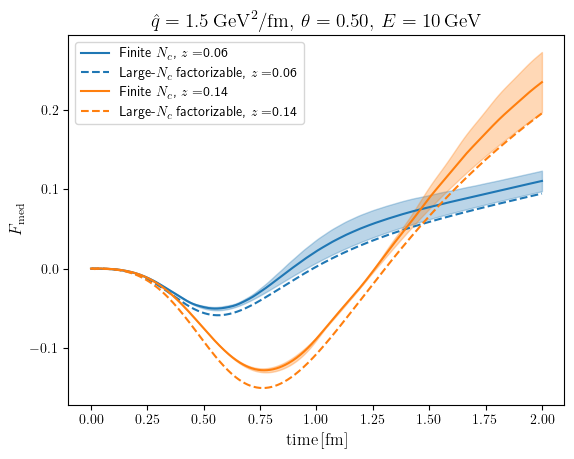

In [6]:
time_frac = 1
theta_t=9
z_t=[4,6]
theta = theta_values[theta_t]
colors = ['C0','C1']
print(theta_values[theta_t],  z_values[z_t])

#plt.figure(dpi=500) # 
plt.rcParams['text.usetex'] = True

for z_n ,col in zip(z_t,colors):
    z = z_values[z_n]
    t,finiteNc,factor,error =  time_plot(z_n,theta_t)

    plt.plot(t,finiteNc, label=r'Finite $N_c$, $z=${:.2f}'.format(z),color=col)
    plt.fill_between(t, np.real(finiteNc)-error, np.real(finiteNc)+error, alpha=.3,color = col)
    
    plt.plot(t,Fmed_diag(t,z,theta), label=r'Large-$N_c$ factorizable, $z=${:.2f}'.format(z),color = col, linestyle = "--")

plt.xlabel(r'$\mathrm{time\,[fm]}$',fontsize =12)
plt.ylabel(r'$F_{\mathrm{med}}$',fontsize =12)

plt.title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, \theta = %.2f,\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,theta,EGev),fontsize=14)

plt.legend(loc="upper left")

plt.savefig(f'plots/Fmed_time_{EGev}.png', bbox_inches='tight')

plt.show()


# Function of theta, z slice

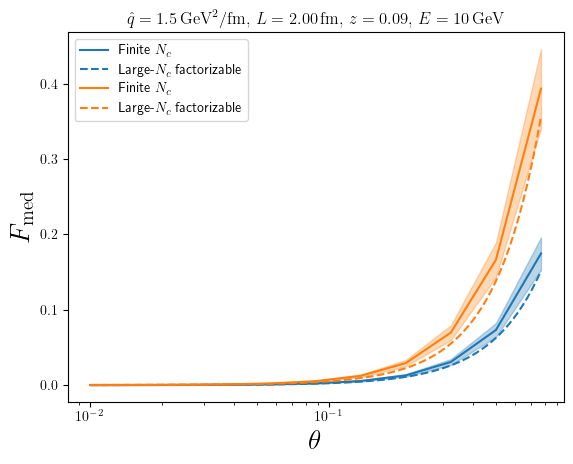

In [7]:
z_th = 3

time_frac = 1
z_th=[3,5]
colors = ['C0','C1']

#z_th=[4]
#colors = ['C0']

#plt.figure(dpi=500)
plt.rcParams['text.usetex'] = True

for z_n ,col in zip(z_th,colors):
    z = z_values[z_n]
    finiteNc,factor,error = theta_plot(time_frac,z_n)

    plt.semilogx(theta_values,finiteNc, label=r'Finite $N_c$'.format(z),color=col)
    plt.fill_between(theta_values, np.real(finiteNc)-error, np.real(finiteNc)+error, alpha=.3,color = col)
    
    plt.semilogx(theta_values_big,Fmed_diag(time,z,theta_values_big), label=r'Large-$N_c$ factorizable'.format(z),color = col, linestyle = "--")


plt.xlabel(r'$\theta$',fontsize =20)

plt.ylabel(r'$F_{\mathrm{med}}$',fontsize =20)
plt.title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, L = %.2f\,\mathrm{fm},\,z=%.2f,\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,time,z,EGev),fontsize=12)


plt.legend(loc="upper left")

plt.savefig(f'plots/Fmed_theta_{EGev}.png', bbox_inches='tight')

plt.show()

2.4318240718613438


<Figure size 3840x2880 with 0 Axes>

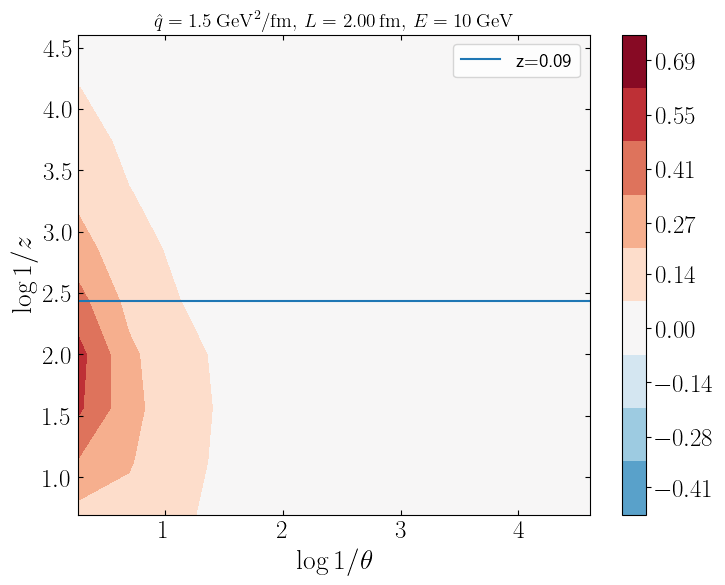

In [8]:
zmi = -0.4
zma = 0.7
print(np.log(1/z))

pl(Fmed_full,0,time,name='Fmed_full',show=False,mima=[zmi,zma])
plt.plot(log_oneover_th,np.array([np.log(1/z)]*len(log_oneover_th)),label = f'z={z:.2f}')

plt.legend(loc="upper right",fontsize=14)

plt.savefig(f'plots/Lund-z-slice_{EGev}.png', bbox_inches='tight')

plt.show()

# function of z, theta slice

0.3237394014347626
0.5


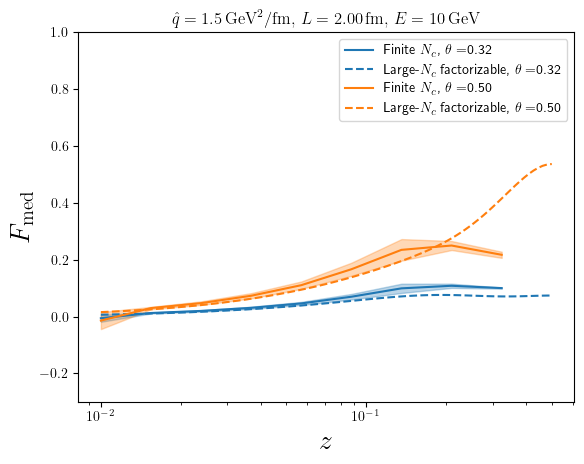

In [9]:

time_frac = 1
th_z=[4,7]
colors = ['C0','C1']

th_z=[8,9]
#colors = ['C0']
last_num = 1

#plt.figure(dpi=500)
plt.rcParams['text.usetex'] = True


for th_n ,col in zip(th_z,colors):
    th = theta_values[th_n]
    print(th)
    finiteNc,factor,error = z_plot(time_frac,th_n)

    plt.semilogx(z_values[:-last_num],finiteNc[:-last_num], label=r'Finite $N_c$, $\theta=${:.2f}'.format(th),color=col)
    plt.fill_between(z_values[:-last_num], np.real(finiteNc[:-last_num])-error[:-last_num], np.real(finiteNc[:-last_num])+error[:-last_num], alpha=.3,color = col)
    
    plt.semilogx(z_values_big,Fmed_diag(time,z_values_big,th), label=r'Large-$N_c$ factorizable, $\theta=${:.2f}'.format(th),color = col, linestyle = "--")

plt.ylim(-0.3,1)

plt.xlabel(r'$z$',fontsize =20)

plt.ylabel(r'$F_{\mathrm{med}}$',fontsize =20)
plt.title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, L = %.2f\,\mathrm{fm},\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,time,EGev),fontsize=12)

plt.legend(loc="upper right")


plt.savefig(f'plots/Fmed_z_{EGev}.png', bbox_inches='tight')


plt.show()

0.6931471805599453


<Figure size 3840x2880 with 0 Axes>

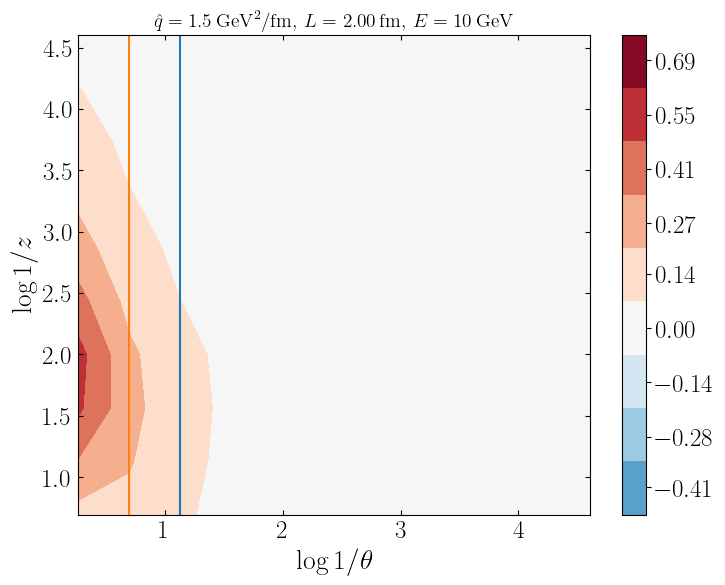

In [10]:
zmi = -0.4
zma = 0.7
print(np.log(1/th))

pl(Fmed_full,0,time,name='Fmed_full',show=False,mima=[zmi,zma])

for th_n ,col in zip(th_z,colors):
    th = theta_values[th_n]

    plt.plot(np.array([np.log(1/th)]*len(log_oneover_z)),log_oneover_z,label = r'$\theta$='+f'{th:.2f}')

#plt.legend(loc="upper right",fontsize=14)

plt.savefig(f'plots/Lund-slice_{EGev}.png', bbox_inches='tight')

plt.show()

# Function of pt, z slice

0.004627321739453663
0.7385983952868139


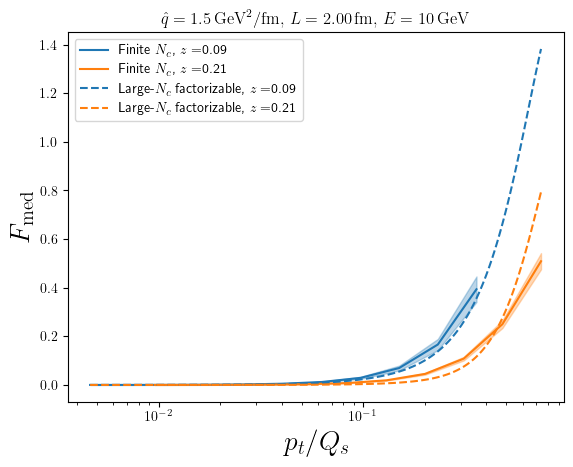

In [11]:
z_th = 3

time_frac = 1
z_th=[5,7]
colors = ['C0','C1']

#z_th=[5]
#colors = ['C0']

#plt.figure(dpi=500)
plt.rcParams['text.usetex'] = True
pmax = []
pmin = []
for z_n ,col in zip(z_th,colors):
    z = z_values[z_n]
    p_values = theta_values*w(z)/Qs
    pmax.append(np.max(p_values))
    pmin.append(np.min(p_values))
    finiteNc,factor,error = theta_plot(time_frac,z_n)

    plt.semilogx(p_values,finiteNc, label=r'Finite $N_c$, $z=${:.2f}'.format(z),color=col)
    plt.fill_between(p_values, np.real(finiteNc)-error, np.real(finiteNc)+error, alpha=.3,color = col)
    
print(np.min(pmin))
print(np.max(pmax))
p_values_ = np.linspace(np.min(pmin),np.max(pmax),100)
for z_n ,col in zip(z_th,colors):
    z = z_values[z_n]
    theta_values_ = p_values_*Qs/w(z)

    plt.semilogx(p_values_,Fmed_diag(time,z,theta_values_), label=r'Large-$N_c$ factorizable, $z=${:.2f}'.format(z),color = col, linestyle = "--")


plt.xlabel(r'$p_t/Q_s$',fontsize =20)

plt.ylabel(r'$F_{\mathrm{med}}$',fontsize =20)
plt.title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, L = %.2f\,\mathrm{fm},\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,time,EGev),fontsize=12)


plt.legend(loc="upper left")

plt.savefig(f'plots/Fmed_pt_{EGev}.png', bbox_inches='tight')

plt.show()

1.5624856262106448


<Figure size 3840x2880 with 0 Axes>

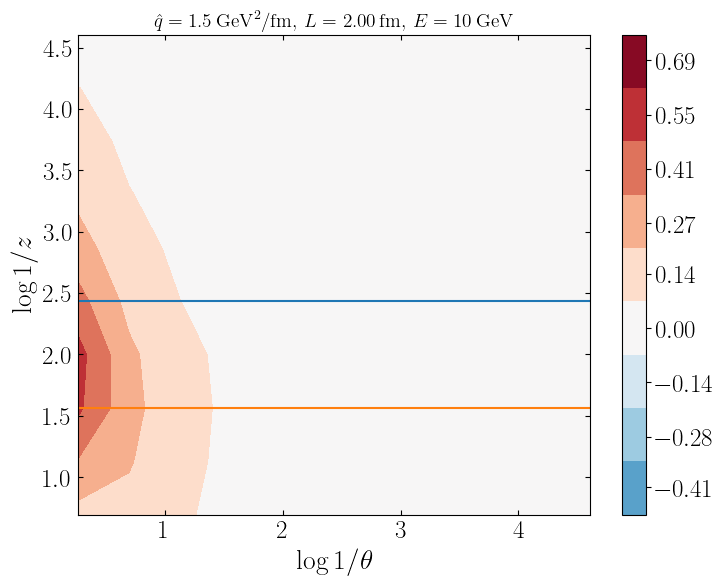

In [12]:
zmi = -0.4
zma = 0.7

print(np.log(1/z))

pl(Fmed_full,0,time,name='Fmed_full',show=False,mima=[zmi,zma])
for z_n in z_th:
    z = z_values[z_n]
    plt.plot(log_oneover_th,np.array([np.log(1/z)]*len(log_oneover_th)),label = f'z={z:.2f}')

#plt.legend(loc="upper right",fontsize=14)

plt.savefig(f'plots/Lund-z-slice_{EGev}.png', bbox_inches='tight')

plt.show()

# Inin plots

In [13]:
time_frac = 1
time_n = int(len(t)*time_frac)-1
time = t[time_n]

Fmed_full,Fmed_Nc,Fmed_diag_sim,Fmed_diag_true = Fmed(time_frac,fmed=False)

Fmed_error_diag_full = abs(Fmed_full-Fmed_diag_sim)/(1+abs(Fmed_full))
Fmed_error_Nc_full = abs(Fmed_full-Fmed_Nc)/(1+abs(Fmed_full))
Fmed_error_diag_Nc = abs(Fmed_Nc-Fmed_diag_sim)/(1+abs(Fmed_Nc))
Fmed_error_diag = abs(Fmed_diag_sim-Fmed_diag_true)/(1+abs(Fmed_diag_true))

<Figure size 3840x2880 with 0 Axes>

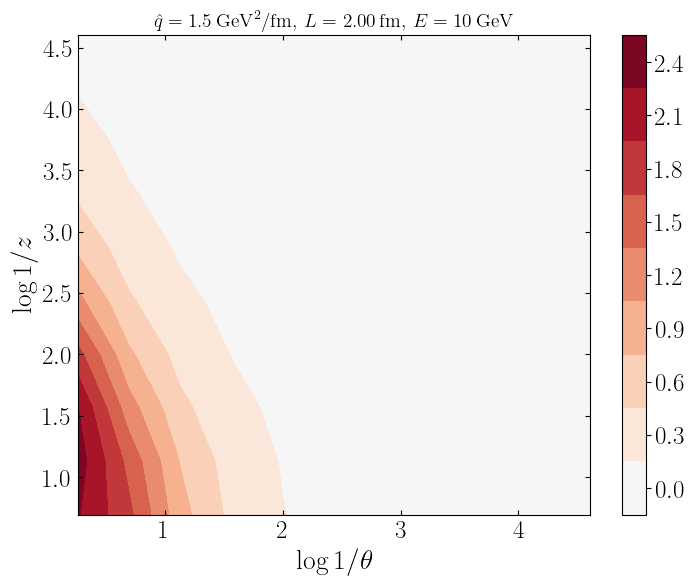

<Figure size 3840x2880 with 0 Axes>

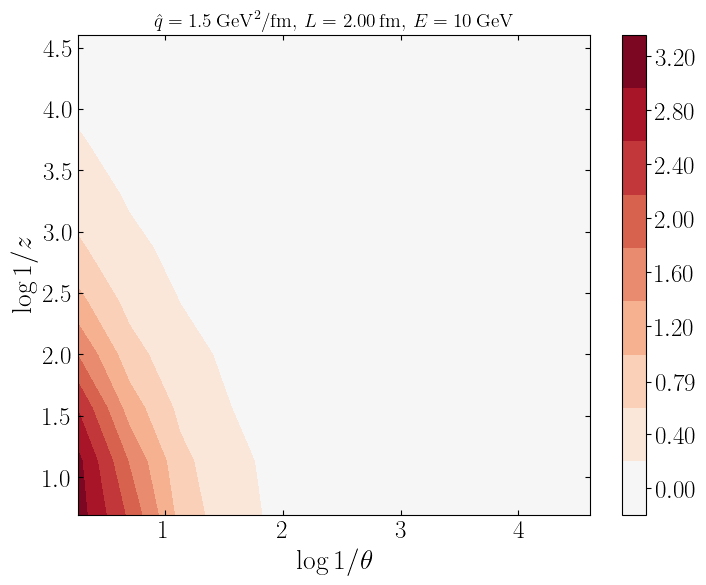

/Users/johannes/Library/CloudStorage/Dropbox/PhD/Code/schrodinger/plot_functions.py:259: UserWarning: Log scale: values of z <= 0 have been masked
  cp = plt.contourf(x,y,zvalues,levels=levels,cmap=plt.get_cmap('YlOrRd'),norm = LogNorm())


<Figure size 3840x2880 with 0 Axes>

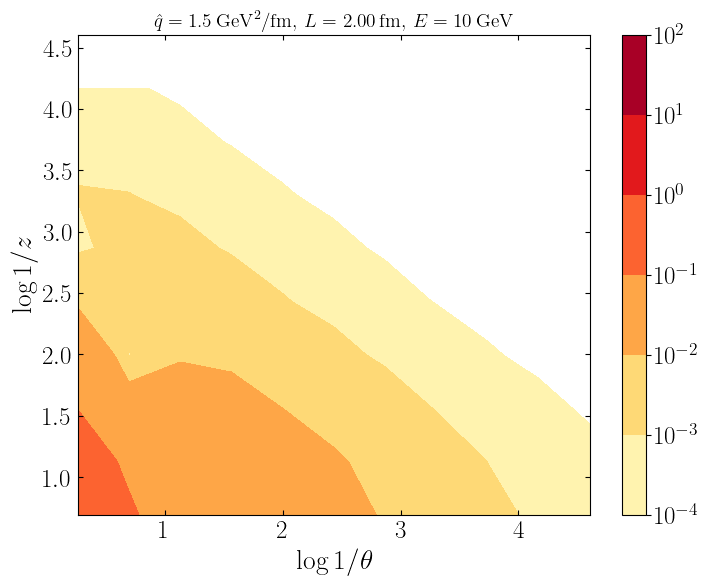

In [14]:
pl(Fmed_full,0,time)
pl(Fmed_diag_true,0,time)
#pl(Fmed_error_Nc_full,0,time,log=True)
pl(Fmed_error_diag_full,0,time,log=True)
#pl(Fmed_error_diag,0,time,log=True)

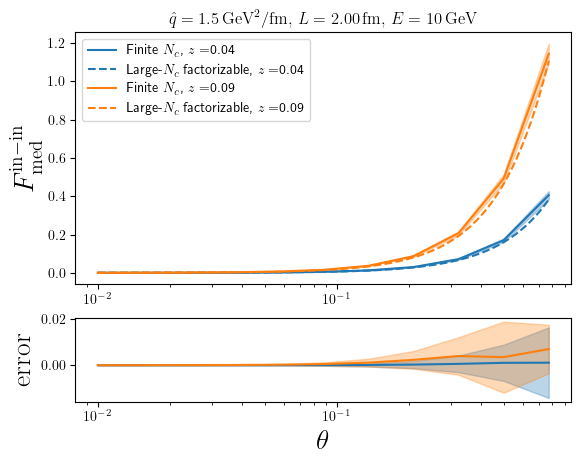

In [15]:
z_th = 3

time_frac = 1
z_th=[3,5]
colors = ['C0','C1']

#z_th=[4]
#colors = ['C0']

#plt.figure(dpi=500)
fig, ((ax1), (ax2)) = subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},dpi=100)
plt.rcParams['text.usetex'] = True

for z_n ,col in zip(z_th,colors):
    z = z_values[z_n]
    finiteNc,factor,error = theta_plot(time_frac,z_n,fmed=False)

    finiteNc_upper = np.real(finiteNc)+error
    finiteNc_lower = np.real(finiteNc)-error

    ax1.semilogx(theta_values,finiteNc, label=r'Finite $N_c$, $z=${:.2f}'.format(z),color=col)

    ax1.fill_between(theta_values, finiteNc_lower,finiteNc_upper, alpha=.3,color = col)
    
    ax1.semilogx(theta_values_big,Fmed_inin(time,z,theta_values_big), label=r'Large-$N_c$ factorizable, $z=${:.2f}'.format(z),color = col, linestyle = "--")

    ax2.semilogx(theta_values,error_cal(finiteNc,factor))

    error_error = np.abs(error_cal(finiteNc,factor)-error_cal(finiteNc,Fmed_inin(time,z,theta_values)))

    ax2.fill_between(theta_values,error_cal(finiteNc,factor)-error_error , error_cal(finiteNc,factor)+error_error, alpha=.3,color = col)

ax2.set_xlabel(r'$\theta$',fontsize =20)

ax1.set_ylabel(r'$F_{\mathrm{med}}^{\mathrm{in-in}}$',fontsize =20)
ax2.set_ylabel(r'$\mathrm{error}$',fontsize =20)
ax1.set_title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, L = %.2f\,\mathrm{fm},\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,time,EGev),fontsize=12)


ax1.legend(loc="upper left")

plt.savefig(f'plots/Fmed_inin_theta_{EGev}.png', bbox_inches='tight')

plt.show()

0.20961440008267676 [0.02385332 0.13572088]


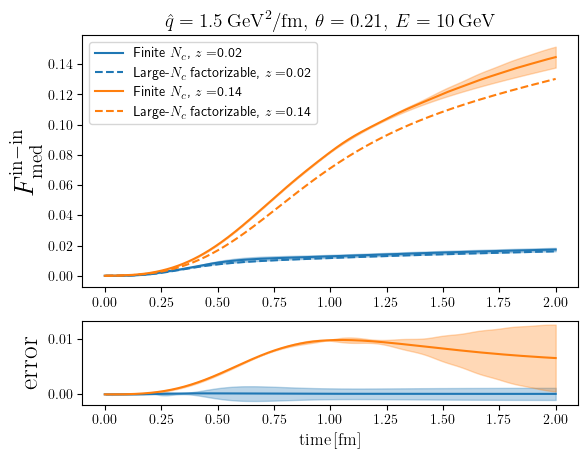

In [16]:
time_frac = 1
theta_t=7
z_t=[2,6]
theta = theta_values[theta_t]
colors = ['C0','C1']
print(theta_values[theta_t],  z_values[z_t])

#plt.figure(dpi=500)
fig, ((ax1), (ax2)) = subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},dpi=100)
plt.rcParams['text.usetex'] = True

for z_n ,col in zip(z_t,colors):
    z = z_values[z_n]
    tt,finiteNc,factor,error =  time_plot(z_n,theta_t,fmed=False)

    finiteNc_upper = np.real(finiteNc)+error
    finiteNc_lower = np.real(finiteNc)-error

    ax1.plot(t,finiteNc, label=r'Finite $N_c$, $z=${:.2f}'.format(z),color=col)
    ax1.fill_between(t, finiteNc_lower, finiteNc_upper, alpha=.3,color = col)
    
    ax1.plot(t,Fmed_inin(t,z,theta), label=r'Large-$N_c$ factorizable, $z=${:.2f}'.format(z),color = col, linestyle = "--")

    ax2.plot(t,error_cal(finiteNc,factor))
    error_error = np.abs(error_cal(finiteNc,factor)-error_cal(finiteNc,Fmed_inin(t,z,theta)))

    ax2.fill_between(t, error_cal(finiteNc,factor)-error_error , error_cal(finiteNc,factor)+error_error, np.abs(factor-finiteNc_upper)/(1+np.abs(finiteNc_upper)), alpha=.3,color = col)

ax2.set_xlabel(r'$\mathrm{time\,[fm]}$',fontsize =12)
ax1.set_ylabel(r'$F_{\mathrm{med}}^{\mathrm{in-in}}$',fontsize =20)
ax2.set_ylabel(r'$\mathrm{error}$',fontsize =20)

ax1.set_title(r'$\hat{q}=%.1f\,\mathrm{GeV}^2/\mathrm{fm},\, \theta = %.2f,\,E = %.0f\,\mathrm{GeV}$'% (qhatmix,theta,EGev),fontsize=14)

ax1.legend(loc="upper left")

plt.savefig(f'plots/Fmed_inin_time_{EGev}.png', bbox_inches='tight')

plt.show()

0.5 [0.5]


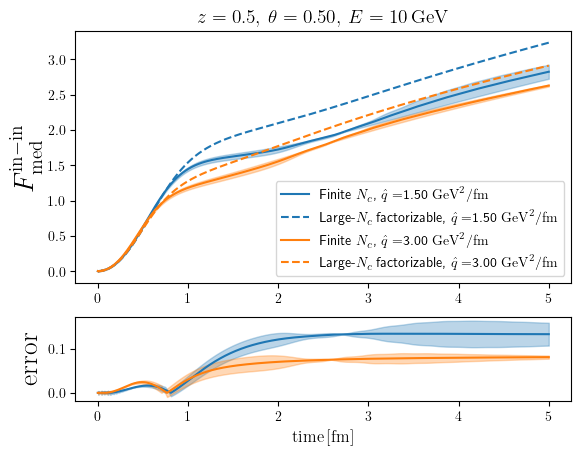

In [17]:
time_frac = 1
theta_t=9
z_t = [9]
z_n = z_t[0]
theta = theta_values[theta_t]
z = z_values[z_n]
colors = ['C0','C1']
print(theta_values[theta_t],  z_values[z_t])

fig, ((ax1), (ax2)) = subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]},dpi=100)
plt.rcParams['text.usetex'] = True

grid_ps = [50,52]
qhats = [1.5,3]

for grid_p ,col,qhat in zip(grid_ps,colors,qhats):
    
    lol = np.load(f'data_files/fasit_qhat={qhat}.npy')
    t = lol[0]
    fmed_qhat = lol[1]

    tt,finiteNc,largeNc,factor,error =  time_plot(z_n,theta_t,fmed=False,L=5,grid_points = grid_p,largeNc=True)

    finiteNc_upper = np.real(finiteNc)+error
    finiteNc_lower = np.real(finiteNc)-error

    ax1.plot(t,finiteNc, label=r'Finite $N_c$, $\hat q=${:.2f}'.format(qhat)+r' $\mathrm{GeV}^2/\mathrm{fm}$',color=col)
    ax1.fill_between(t, finiteNc_lower, finiteNc_upper, alpha=.3,color = col)

    ax1.plot(t,fmed_qhat, label=r'Large-$N_c$ factorizable, $\hat q=${:.2f}'.format(qhat)+r' $\mathrm{GeV}^2/\mathrm{fm}$',color = col, linestyle = "--")

    ax2.plot(t,error_cal(finiteNc,factor))

    error_error = np.abs(error_cal(finiteNc,factor)-error_cal(finiteNc,fmed_qhat))

    ax2.fill_between(t, error_cal(finiteNc,factor)-error_error , error_cal(finiteNc,factor)+error_error, np.abs(factor-finiteNc_upper)/(1+np.abs(finiteNc_upper)), alpha=.3,color = col)



ax2.set_xlabel(r'$\mathrm{time\,[fm]}$',fontsize =12)
ax1.set_ylabel(r'$F_{\mathrm{med}}^{\mathrm{in-in}}$',fontsize =20)
ax2.set_ylabel(r'$\mathrm{error}$',fontsize =20)

ax1.set_title(r'$z=%.1f,\, \theta = %.2f,\,E = %.0f\,\mathrm{GeV}$'% (z,theta,EGev),fontsize=14)

ax1.legend(loc="lower right")

plt.savefig(f'plots/Fmed_inin_time_{EGev}_differentqhat.png', bbox_inches='tight')

plt.show()